In [34]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.tree import export_text
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Carregar o conjunto de dados MNIST
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"], mnist["target"]

# Pré-processamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [37]:
# Treinamento dos classificadores individuais
knn_clf = KNeighborsClassifier(n_neighbors=50)
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

knn_clf.fit(X_train, y_train)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [38]:
# Criação do Ensemble Classifier usando Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('knn', knn_clf), ('tree', tree_clf)],
    voting='hard' # Pode ser 'soft' para pesos diferentes
)

In [43]:
# Treinamento do ensemble classifier
voting_clf.fit(X_train, y_train)

# Avaliação do ensemble classifier
y_pred = voting_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Acurácia do Ensemble Classifier:", accuracy)
print("Acurácia do Ensemble Classifier:", accuracy_knn)
print("Acurácia do Ensemble Classifier:", accuracy_tree)

Acurácia do Ensemble Classifier: 0.8894285714285715
Acurácia do Ensemble Classifier: 0.9182857142857143
Acurácia do Ensemble Classifier: 0.8583571428571428


              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1343
           1       0.84      0.99      0.91      1600
           2       0.86      0.89      0.88      1380
           3       0.83      0.91      0.87      1433
           4       0.86      0.92      0.89      1295
           5       0.88      0.83      0.85      1273
           6       0.97      0.89      0.93      1396
           7       0.92      0.89      0.91      1503
           8       0.98      0.76      0.86      1357
           9       0.96      0.79      0.87      1420

    accuracy                           0.89     14000
   macro avg       0.90      0.89      0.89     14000
weighted avg       0.90      0.89      0.89     14000



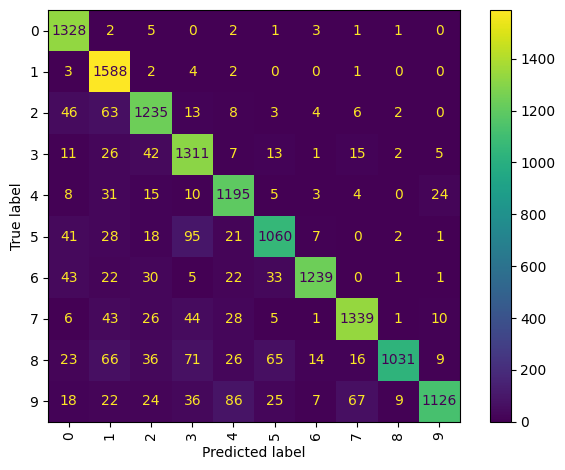

In [40]:
class_names = sorted(list(mnist.target.unique()))
report = classification_report(y_test, y_pred, target_names=class_names)

print(report)
ConfusionMatrixDisplay.from_estimator(
    voting_clf, X_test, y_test, display_labels= class_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

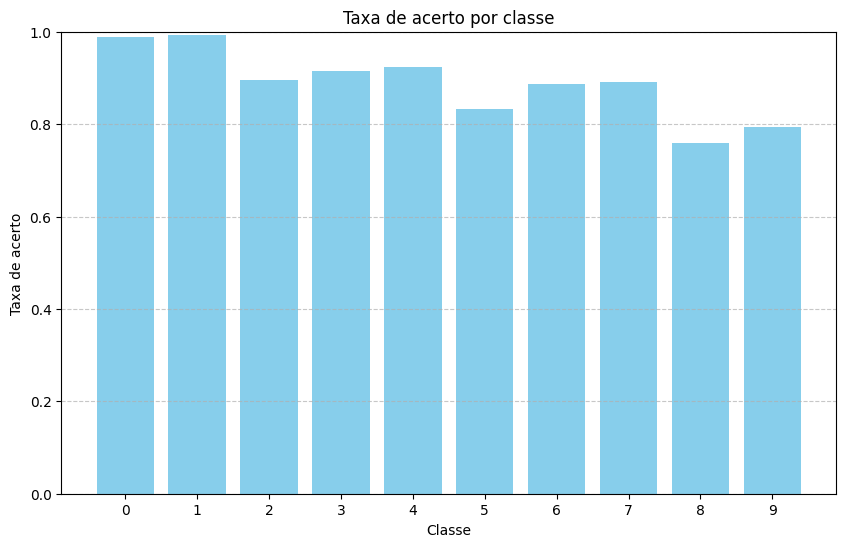

In [41]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular as taxas de acerto de cada classe
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(np.arange(10), class_accuracy, color='skyblue')
plt.title('Taxa de acerto por classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de acerto')
plt.xticks(np.arange(10), np.arange(10))
plt.ylim(0, 1)  # Define o limite y de 0 a 1 para as taxas de acerto
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()